# Read, Write and display images with OpenCV

In [1]:
import cv2

In [2]:
#show the version of open cv
print(cv2.__version__)

4.9.0


## 1.Read the image

In [3]:
#read the image
input_image = cv2.imread('input.jpg')
#show the image
cv2.imshow('input',input_image)

#I had to add the following or otherwise it would show a blank window and would crash
cv2.waitKey(0)

-1

In [4]:
#check image attribute
print(input_image.shape) # height, width, number of color channels (2 colors channels RGB)
print(input_image.size) # the size the images occupy, it is the width multiplyed by height
print(input_image.dtype) # pixels data type

(415, 622, 3)
774390
uint8


In [5]:
# check only the height of the image
print('height',input_image.shape[0])
# check only the width of the image
print('width',input_image.shape[1])
#check the number of channels
print('channels',input_image.shape[2])

height 415
width 622
channels 3


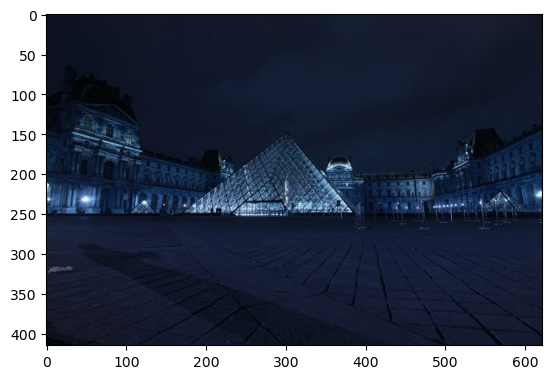

In [6]:
# another way to show the image
import matplotlib.pyplot as plt

# reading image
image = cv2.imread('input.jpg')

# displaying image
plt.imshow(image)
plt.show()

Reason why when using OpenCV or matplotlib the image colors are different:
* OpenCV reads the color in BGR format
* Matplotlib reads the image in RGB format

## 2. Convert the image in different color space by example from BRG to RGB

In [7]:
img_rgb=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
#cv2_imshow(img_rgb) only works in google colab

In [8]:
#code to work around the bug of imshow that crashes and we run it without the hold
while True:
    cv2.imshow('Input',img_rgb)
    if cv2.waitKey(20) & 0xFF == ord('d'):
        break
cv2.destroyAllWindows()

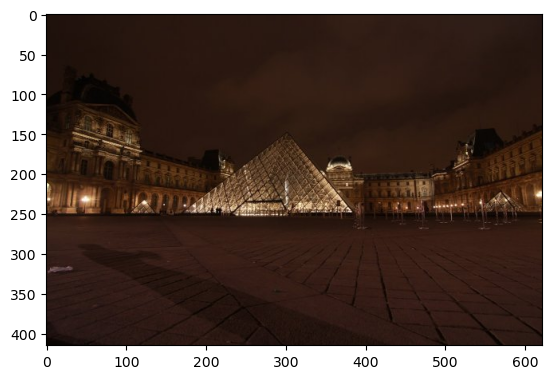

In [9]:
img_rgb=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [10]:
#convert image from BGR to grey scale
img_grayscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
#show the image
cv2.imshow('input',img_grayscale)

#I had to add the following or otherwise it would show a blank window and would crash
cv2.waitKey(0)

-1

In [11]:
print(img_grayscale.shape)
print(img_grayscale.size)
print(img_grayscale.dtype)

(415, 622)
258130
uint8


In [12]:
#save the image to my local machine
cv2.imwrite('output.png',img_grayscale)
print('image saved')

image saved


# Attributes in imread function

##  1.cv.IMREAD_GRAYSCALE - If set, it allways converts the image to single-channel grayscale image.
##  2.cv.IMREAD_UNCHANGED - IF set, it returns the loaded image as it is and ignores the EXIF orientation.
##  3.cv.IMREAD_COLOR - If set, it allways converts the image to 3-channel BGR color image.
##  4.cv.IMREAD_ANYDEPTH - If set, it returns a 16-bit or 32-bit image when the input has the corresponding depth; otherwise it converts it to 8-bit.
##  5.cv.IMREAD_ANYCOLOR - If setm the image is read in any possible color format.

-------------------------------------------------------------------------------------------------------------------

### 1. cv.IMREAD_GRAYSCALE - If set, it allways converts the image to single-channel grayscale image.

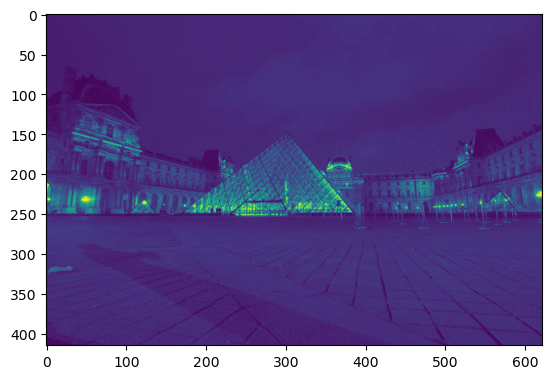

In [21]:
#.IMREAD_GRAYSCALE 
#show th image in greyscale

# reading image
image_grey = cv2.imread('input.jpg',cv2.IMREAD_GRAYSCALE)

# displaying image
plt.imshow(image_grey)
plt.show()

In [23]:
#save the image to my local machine
cv2.imwrite('grey.png',img_grayscale)
print('image saved')

image saved


### 2. cv.IMREAD_UNCHANGED - IF set, it returns the loaded image as it is and ignores the EXIF orientation.

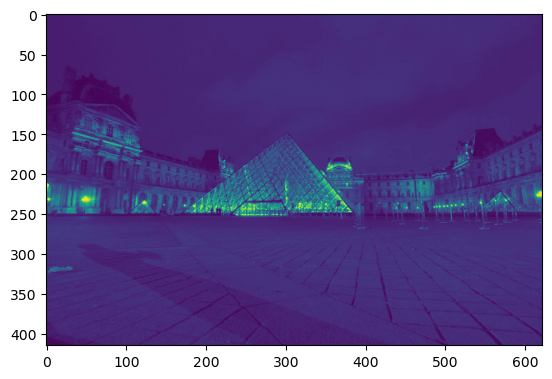

In [25]:
#.IMREAD_UNCHANGED 
#by example if a image was converted to greyscale it will set the image to the original state(color by example)

# reading image
image_unchanged = cv2.imread('grey.png',cv2.IMREAD_UNCHANGED)

# displaying image
plt.imshow(image_unchanged)
plt.show()

In [28]:
image_unchanged.shape

(415, 622)

In [32]:
# some images can have a 4th dimension, that dimension os the transparency , if the value is 0 the image is fully transparent
# if it is 255 the image is the opposite. When we do  imread unchanged the fourth channel will be loaded,
#but some images don't support alpha channel like png that is the case
if len(image_unchanged.shape) == 3:
    print('image has alpha channel')
else:
    print('image does not have alpha channel')

image does not have alpha channel


### 3. cv.IMREAD_COLOR - If set, it allways converts the image to 3-channel BGR color image.

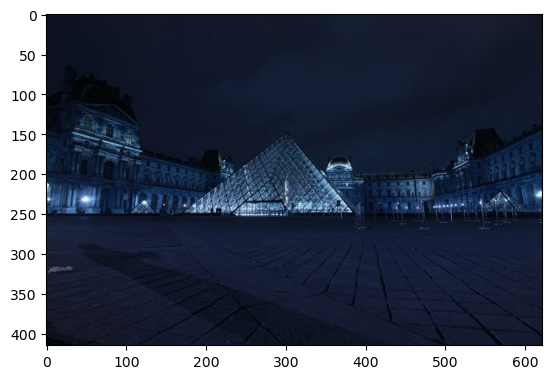

In [19]:
#.IMREAD_COLOR 
#show th image in BGR color

# reading image
image_color = cv2.imread('input.jpg',cv2.IMREAD_COLOR)

# displaying image
plt.imshow(image_color)
plt.show()

### 4. cv.IMREAD_ANYDEPTH - If set, it returns a 16-bit or 32-bit image when the input has the corresponding depth; otherwise it converts it to 8-bit.

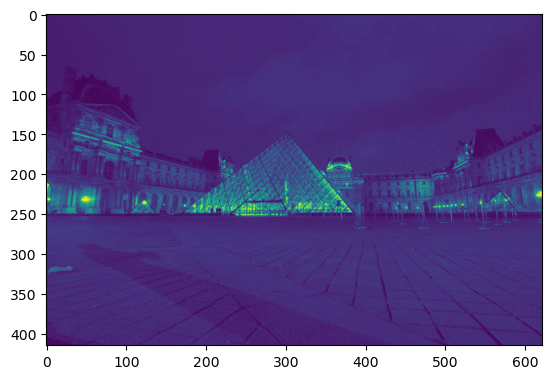

In [36]:
# Any depth allows to load the image in any bit depth 16,32 ...
image_depth=cv2.imread('input.jpg',cv2.IMREAD_ANYDEPTH)

# displaying image
plt.imshow(image_depth)
plt.show() #by default it will show the image in greyscale because opencv can't interpret that has a color

In [37]:
print('image shape',image_depth.shape)
print('mage datatype',image_depth.dtype)

image shape (415, 622)
mage datatype uint8


### 5.cv.IMREAD_ANYCOLOR - If setm the image is read in any possible color format.

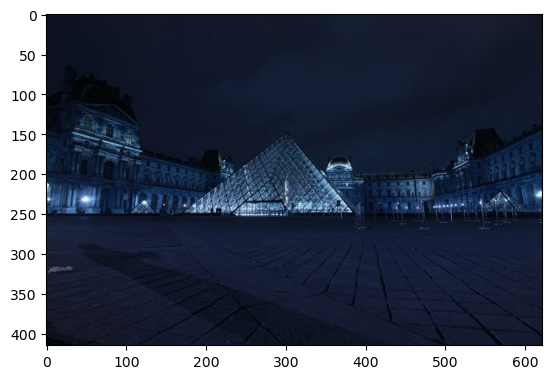

In [38]:
# Any color   
#If set, the image is read in any possible color format.
#So, you may not notice a difference if ANYCOLOR ends up choosing RGB to read
image_color=cv2.imread('input.jpg',cv2.IMREAD_ANYCOLOR)

# displaying image
plt.imshow(image_color)
plt.show() 

#### Saving the image will show different colors due to how jupyter reads the image color!!!

## show components of image

In [39]:
B,G,R=input_image[10,50]
print(B,G,R)

12 19 34


In [40]:
#shape of input image
input_image.shape

(415, 622, 3)

In [41]:
print(input_image) #shows numpy array for color image, each pixel have 3 values

[[[12 18 31]
  [12 18 31]
  [12 18 31]
  ...
  [21 24 38]
  [21 24 38]
  [21 24 38]]

 [[12 18 31]
  [12 18 31]
  [12 18 31]
  ...
  [21 24 38]
  [21 24 38]
  [21 24 38]]

 [[12 18 31]
  [12 18 31]
  [12 18 31]
  ...
  [21 24 38]
  [21 24 38]
  [20 23 37]]

 ...

 [[ 4  7 11]
  [ 3  6 10]
  [ 3  6 10]
  ...
  [20 24 42]
  [22 24 42]
  [21 23 41]]

 [[ 3  6 10]
  [ 3  6 10]
  [ 3  6 10]
  ...
  [21 25 43]
  [22 24 42]
  [22 24 42]]

 [[ 2  5  9]
  [ 2  5  9]
  [ 2  5  9]
  ...
  [19 23 41]
  [20 22 40]
  [20 22 40]]]


In [43]:
#for greyscale image we are going to have only one value
image_grey.shape

(415, 622)

In [45]:
pos = image_grey[0,0]
pos

21

In [46]:
print(image_grey) # simple 2d array

[[21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 27]
 ...
 [ 8  7  7 ... 29 29 28]
 [ 7  7  7 ... 30 29 29]
 [ 6  6  6 ... 28 27 27]]


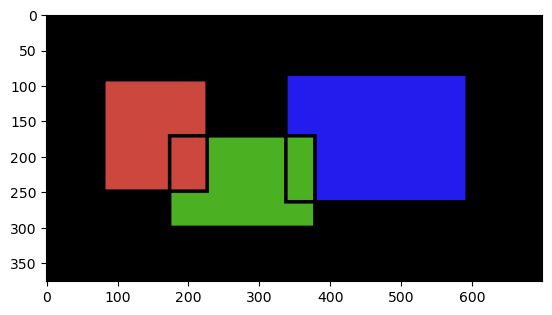

In [48]:
# load rgb image
my_img1 = cv2.imread('newrgb.png')
plt.imshow(my_img1)

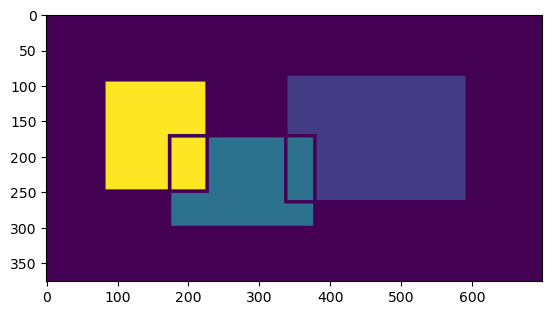

In [61]:
#split the blue channel from green channel and red channel
r_channel,g_channel,b_channel=cv2.split(my_img1)

#display each channel , other color intensitys won't be visible
plt.imshow(r_channel)

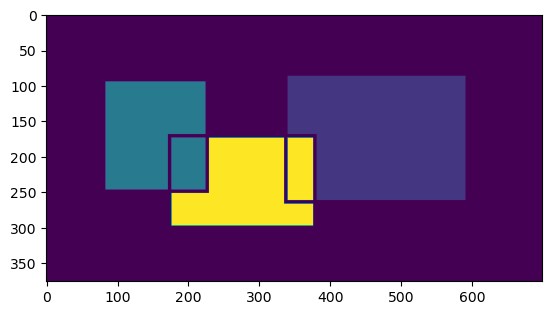

In [62]:
plt.imshow(g_channel)

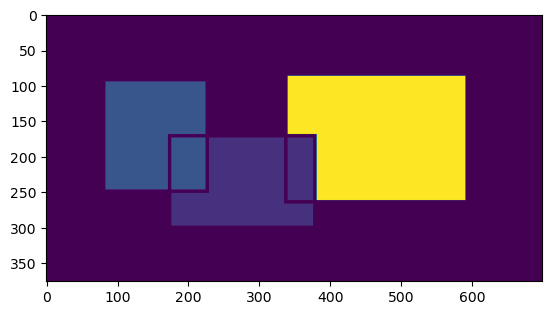

In [63]:
plt.imshow(b_channel)

We can sse in the images above that the intensity for the color channel that we have split have more intensity(yellow in this example).

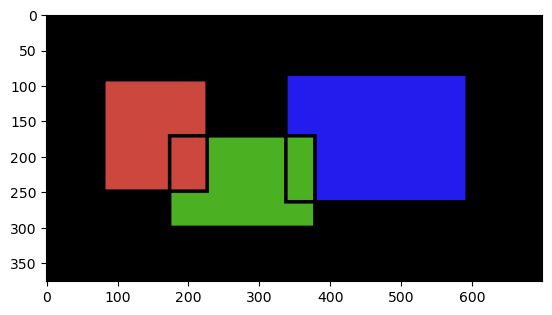

In [64]:
plt.imshow(my_img1)

In [65]:
#After the split the intensity of red channel will be up and the other colors will be down
while True:
    cv2.imshow('red channel',r_channel)
    if cv2.waitKey(20) & 0xFF == ord('d'):
        break
cv2.destroyAllWindows()

In [66]:
while True:
    cv2.imshow('green channel',g_channel)
    if cv2.waitKey(20) & 0xFF == ord('d'):
        break
cv2.destroyAllWindows()

In [67]:
while True:
    cv2.imshow('blue channel',b_channel)
    if cv2.waitKey(20) & 0xFF == ord('d'):
        break
cv2.destroyAllWindows()

In [68]:
while True:
    cv2.imshow('red channel',r_channel)
    cv2.imshow('green channel',g_channel)
    cv2.imshow('blue channel',b_channel)
    cv2.imshow('rgb image',my_img1)
    if cv2.waitKey(20) & 0xFF == ord('d'):
        break
cv2.destroyAllWindows()

## <u>In the next example we are setting all the other channels to zero to only show the Blue channel:</u>

In [69]:
import numpy as np

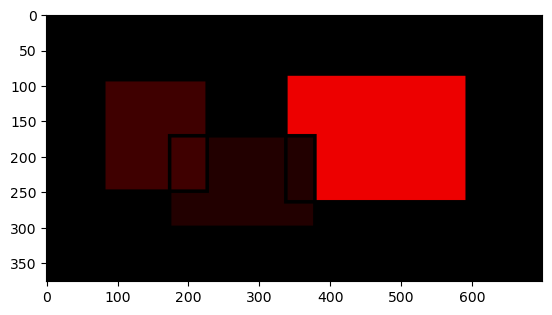

In [80]:
# define zero matrix
zeros= np.zeros(b_channel.shape,dtype='uint8')

# merge zeros to make BGR image
blueBGR=cv2.merge([b_channel,zeros,zeros])

plt.imshow(blueBGR)


In [81]:
while True:
    cv2.imshow('blue channel',blueBGR)

    if cv2.waitKey(20) & 0xFF == ord('d'):
        break
cv2.destroyAllWindows()

In [ ]:
### <u>Note: Apply all the code to another image to get some practice!!!